# Cleaning the Dataset

The MMR column was used as the basis for the measles, mumps, and rubella vaccination rate per school. All the rows that did not include their MMR values were removed as it does not have a basis for their rate of vaccinations.

In [9]:
# Import libraries and read the datasets.

import pandas as pd # Data Manipulation
import matplotlib.pyplot as plt # Plotting
import geopandas as gpd # Geo analytics
import seaborn as sns # Plotting

measles_raw = pd.read_csv("data/measles.csv")

# All schools which did not indicate their vaccination rates are dropped from the dataset.

measles = measles_raw[measles_raw['mmr'] > 0]
measles

,index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
0,1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NaN,51.0,100.00,-1.00,NaN,NaN,NaN,31.347819,-110.938031
1,2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NaN,22.0,100.00,-1.00,NaN,NaN,NaN,32.221922,-110.896103
2,3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NaN,85.0,100.00,-1.00,NaN,NaN,NaN,32.130493,-111.117005
3,4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NaN,60.0,100.00,-1.00,NaN,NaN,NaN,33.485447,-112.130633
4,5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NaN,43.0,100.00,-1.00,NaN,2.33,2.33,33.495620,-112.224722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44692,1364,Washington,NaN,Overcomer Academy,NaN,Auburn,King,NaN,NaN,23.53,17.65,NaN,11.76,23.53,47.301117,-122.276320
44693,1365,Washington,NaN,Salvation Christian Academy- Formerly Slavic C...,NaN,Edgewood,Pierce,NaN,NaN,22.22,22.22,NaN,NaN,55.56,47.249023,-122.287615
44694,1366,Washington,NaN,Saratoga,NaN,Stanwood,Snohomish,NaN,NaN,20.00,20.00,NaN,6.67,26.67,48.242579,-122.359097
44695,1367,Washington,NaN,Skagit Family Learning Center,NaN,Mount Vernon,Skagit,NaN,NaN,17.65,11.76,NaN,2.94,20.59,48.406426,-122.339166


In [ ]:
%%capture
pip install geopandas

# Vaccination Rate Per State

A groupby function was used to make a dataframe that indicates the values per state. Through a sort_values function, the states were sorted based on the mean of their mmr^2 values. mmr^2 values are the squared mmr values in order to emphasize the differences between each state. Through a bar plot, the vaccination rates per state were shown with the x - value as the state, and the y - value as the mmr^2.

Majority of the states have similar mmr values, except for the state of Illinois. This indicates that the vaccination for measles have covered several schools in the sates which protect students from the disease.

Text(0.5, 1.0, 'Vaccination Rates on States with Vaccination Records')

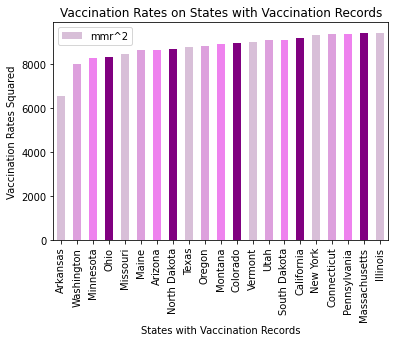

In [10]:
# In order to emphasize the mmr differences between states, all mmr values are squared. The squared values are designated to a new column 'mmr^2'

measles['mmr^2'] = measles['mmr'] ** 2

# The mmr values of all schools are averaged for each state. The rows were then sorted based on the value of the mmr^2 column.

by_state = (measles.groupby(by = "state").mean()).sort_values('mmr^2')
color = ['thistle','plum','violet','purple']

# Through a bar plot, the vaccination rates for each state are shown. Most states have similar values, except for Arkansas which has a signficantly lower mmr value compared to other states.

ax = by_state.plot.bar(y = 'mmr^2', color = color)
ax.set_ylabel("Vaccination Rates Squared")
ax.set_xlabel("States with Vaccination Records")
ax.set_title("Vaccination Rates on States with Vaccination Records")

# MMR per School

Similar with the by state data frame, through a groupby function, all schools were grouped based on their own type. The mean of their mmr^2 values were sorted with a sort_values function. A barplot was used to display the values, with the x - values as the type of school, and the y - values as the vaccination rate.

BOCES schools have the highest vaccination rates, while kindergarten, non public, private, and public schools have similar high vaccination rates. Charter schools are the lowest and there is a notable difference with the average as seen in the graph. Charter schools receive less funding compared tradtional schools in the United States.

Text(0.5, 1.0, 'Vaccination Rates on Different Types of Schools')

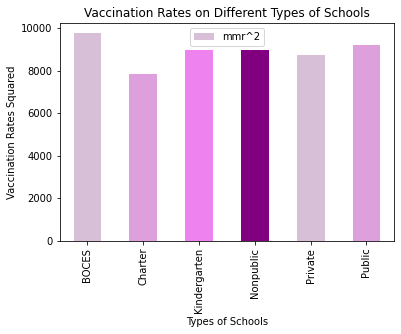

In [11]:
# The mmr values of all schools are averaged for each type of school. The rows were then sorted based on the value of the mmr^2 column.

measles_by_type = measles.groupby(by = 'type').mean()

# Through a bar plot, the vaccination rates for each school type are shown. Most states have similar values, except for Charter schools which has a signficantly lower mmr value compared to other types.

ax = measles_by_type.plot.bar(y = ('mmr^2'), color = color)
ax.set_ylabel("Vaccination Rates Squared")
ax.set_xlabel("Types of Schools")
ax.set_title("Vaccination Rates on Different Types of Schools")

# Map of Vaccination Rates

A map of the United States was made with the geopandas library. A seaborn scatterplot was made that displays the location for each school, and the lighter the hue, the higher the mean of their mmr. 

Based on the map, the higher the population of the location of the school the higher the vaccination rate is. Those schools that reside in city centers such as New York City, San Francisco City, and Los Angeles City have the highest vaccination rates within their schools.

Text(0.5, 1.0, 'Vaccination Rates USA')

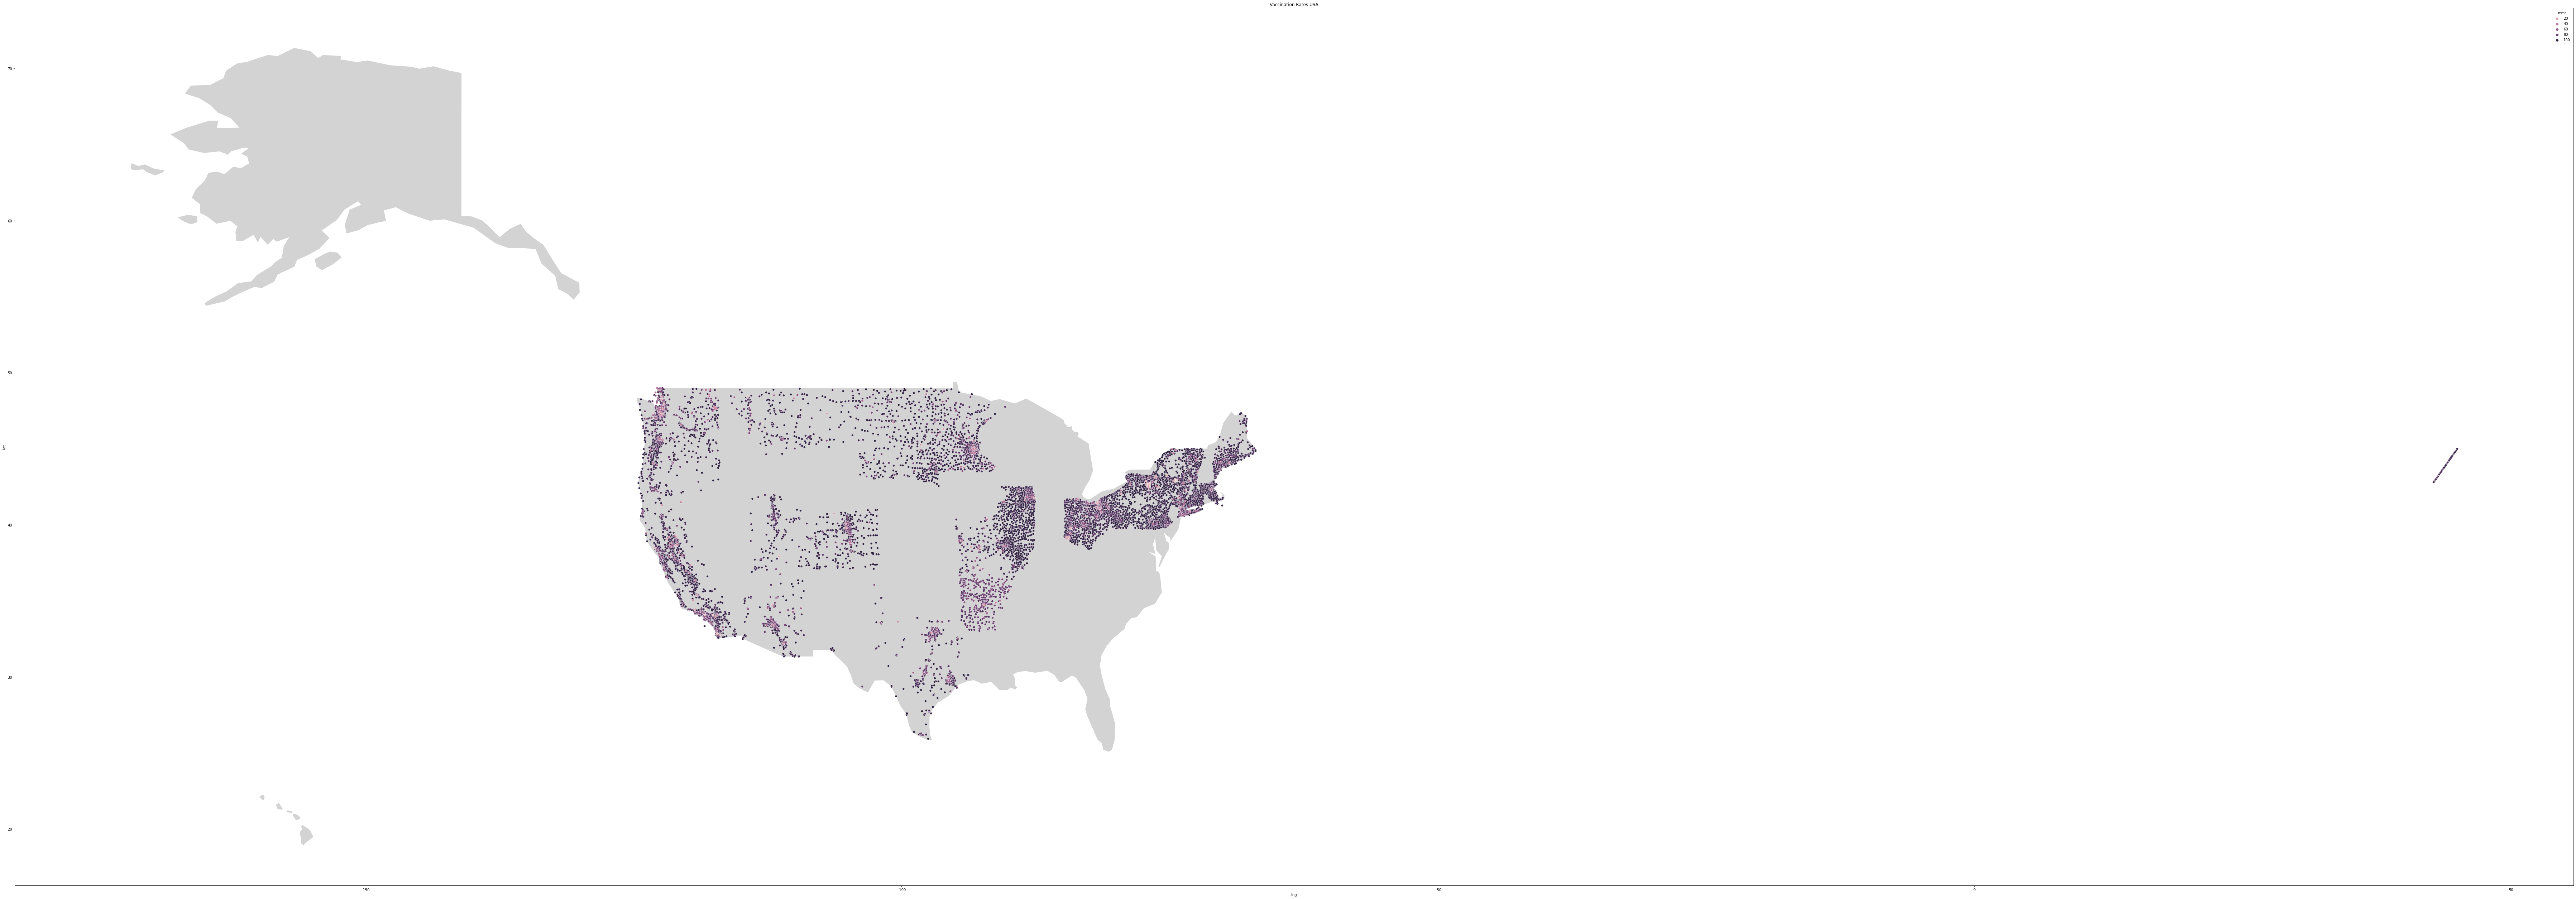

In [12]:
fig, ax = plt.subplots(figsize=(128,96))

# Through a bar plot, the vaccination rates for each school type are shown. Most states have similar values, except for Charter schools which has a signficantly lower mmr value compared to other types.

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "United States of America"].plot(color="lightgrey", ax = ax)
states_map = sns.scatterplot(x="lng", y="lat", data = measles, ax = ax, hue = 'mmr')
states_map.set_title("Vaccination Rates USA")

# Vaccine Exmeption

The xrel, xmed, and xper columns show the percentage of individuals who were exempted of getting vaccination because of religious, medical, and personal reasons respectively. For each reason, those rows that did not include a number were removed. The measles_raw dataset was used, because only the reason columns were needed for this analysis.

In [13]:
religion_reas = measles_raw[measles_raw['xrel'] > 0]
medical_reas = measles_raw[measles_raw['xmed'] > 0]
personal_reas = measles_raw[measles_raw['xper'] > 0]

The mean for each reason for exemption is averaged to identify what most likely is the reason to why someone is exempted to getting vaccinated. A dictionary for each average and reason was made, which was then turned into a dataframe for the plot.

An individual is most likely to be hesitant from getting a vaccine due to their personal reasons (it is not stated if political reasons are part of their personal reasons). Medical reasons come in a far second with less than double of the largest value. And religious reasons come in third, with only a third of the 2nd value.

Text(0, 0.5, 'Reason of Exemption')

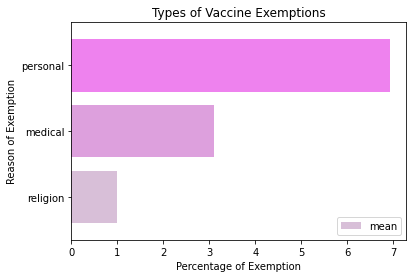

In [18]:
xrel_mean = religion_reas['xrel'].mean()
xmed_mean = medical_reas['xmed'].mean()
xper_mean = personal_reas['xper'].mean()

data = {'reason': ['religion','medical','personal'], 'mean': [xrel_mean, xmed_mean,xper_mean]}
df = pd.DataFrame.from_dict(data)

ax = df.plot.barh(x = 'reason',y = 'mean', width = 0.8, color = color)
ax.set_title('Types of Vaccine Exemptions')
ax.set_xlabel('Percentage of Exemption')
ax.set_ylabel('Reason of Exemption')